In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)
#sns.set_palette('husl')
sns.set_style("darkgrid")

In [2]:
accbase = np.load("accbase.npy")
accopt = np.load("accopt.npy")

Text(0.5, 1.0, 'Accuracy vs Overlap, 10 runs')

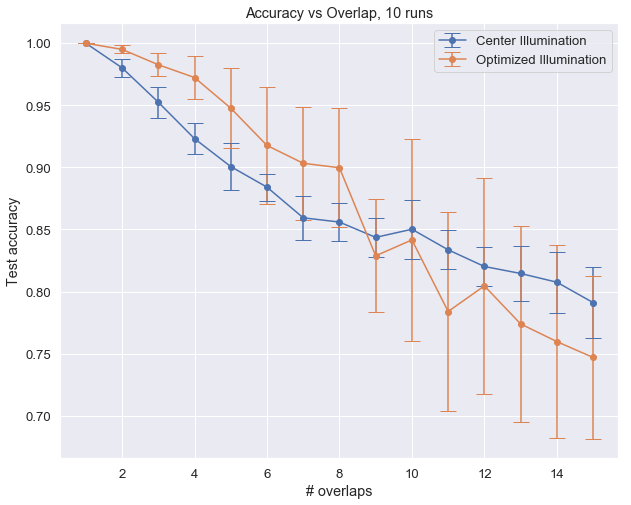

In [3]:
stdb = np.std(accbase, axis=1)
meanb = np.mean(accbase, axis=1)
stdo = np.std(accopt, axis=1)
meano = np.mean(accopt, axis=1)
plt.figure(figsize=(10,8))
plt.errorbar(np.arange(1,16), meanb, yerr=[stdb, stdb], fmt = "-o", capsize=8, label="Center Illumination")
plt.errorbar(np.arange(1,16), meano, yerr=[stdo, stdo], fmt = "-o", capsize=8, label="Optimized Illumination")
plt.legend()
plt.xlabel("# overlaps")
plt.ylabel("Test accuracy")
plt.title("Accuracy vs Overlap, 10 runs")

In [ ]:
import os

weights = np.load("weight.npy")
path = "E:/MicroscopeExperiments/590proj/"
for i in range(15):
    folder = os.path.join(path, 'Overlap %d'%(i+1))
    os.mkdir(folder)
    for j in range(10):
        out = os.path.join(folder,"weights%d.txt"%(j+1))
        w = weights[i,j,:,:]
        np.savetxt(out, w)

In [4]:
weights = np.load("weight.npy")

In [5]:
weights.shape

(15, 10, 123, 1)

(10, 123)


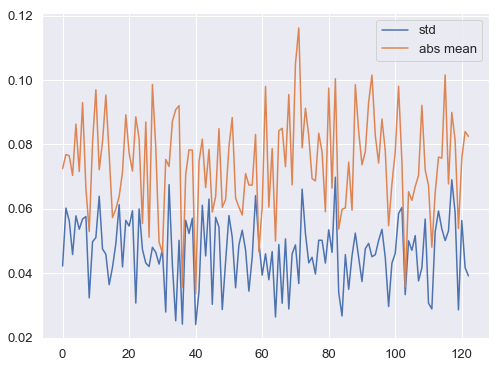

In [18]:
weight0 = np.abs(np.squeeze(weights[0,:,:,:]))
print(weight0.shape)
std = np.std(weight0, axis = 0)
mean = np.mean(weight0, axis = 0)
plt.figure(figsize = (8,6))
plt.plot(std, label = 'std')
plt.plot(np.abs(mean), label = 'abs mean')
plt.legend()